In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
#Load and Clean Data
stock = "ZOMATO.NS" #change the symbol to change the stock
start_date = dt.datetime.today() - dt.timedelta(days=365*7)
end_date = dt.datetime.today() - dt.timedelta(days=30)
data = yf.download(stock, start=start_date, end=end_date)
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,
2021-07-23,126.000000,138.899994,115.000000,116.000000,694895290
2021-07-26,140.649994,143.750000,125.300003,126.349998,249723854
2021-07-27,132.899994,147.800003,127.750000,141.699997,240341900
2021-07-28,131.199997,135.000000,123.550003,131.000000,159793731
2021-07-29,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...
2025-02-24,222.690002,227.800003,219.979996,219.979996,43335473
2025-02-25,225.630005,230.179993,223.050003,224.199997,48478366


In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
count,894.000000,894.000000,894.000000,894.000000,8.940000e+02
mean,130.127595,132.962819,127.462819,130.387740,6.456179e+07
std,72.022900,73.325655,70.646650,72.040681,6.711028e+07
min,41.650002,44.400002,40.599998,40.849998,0.000000e+00
25%,65.250000,66.962502,64.012501,65.462498,3.190383e+07
50%,116.500000,119.000000,114.250000,116.950001,4.713776e+07
75%,182.145004,185.225002,178.849998,182.450001,7.161956e+07
max,302.950012,304.700012,296.250000,304.700012,6.948953e+08


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894 entries, 2021-07-23 to 2025-03-03
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, ZOMATO.NS)   894 non-null    float64
 1   (High, ZOMATO.NS)    894 non-null    float64
 2   (Low, ZOMATO.NS)     894 non-null    float64
 3   (Open, ZOMATO.NS)    894 non-null    float64
 4   (Volume, ZOMATO.NS)  894 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 41.9 KB


In [10]:
data = data.dropna()
data

Price,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,
2021-07-23,126.000000,138.899994,115.000000,116.000000,694895290
2021-07-26,140.649994,143.750000,125.300003,126.349998,249723854
2021-07-27,132.899994,147.800003,127.750000,141.699997,240341900
2021-07-28,131.199997,135.000000,123.550003,131.000000,159793731
2021-07-29,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...
2025-02-24,222.690002,227.800003,219.979996,219.979996,43335473
2025-02-25,225.630005,230.179993,223.050003,224.199997,48478366


In [12]:
data = data.reset_index()
data.shape

(894, 6)

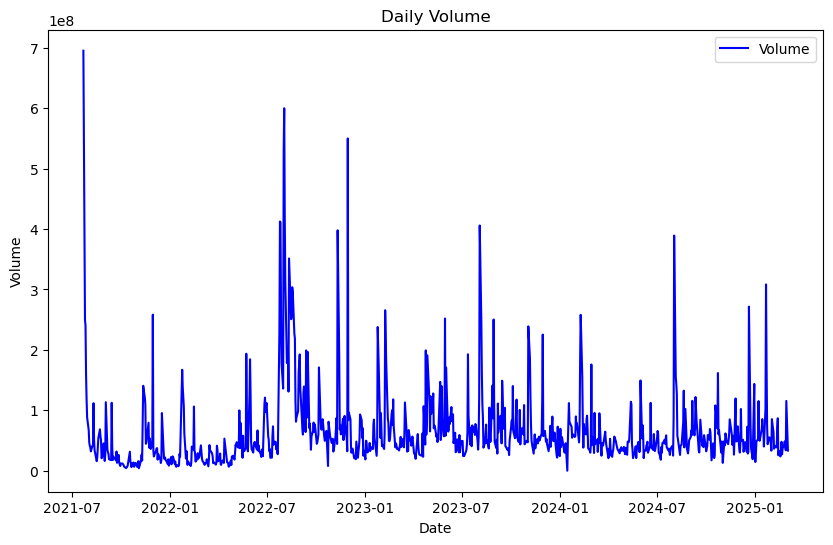

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='blue')
plt.title('Daily Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()